# D2 States

Simple overlap of IDR peaks into different states.

In [30]:
library(GenomicRanges)
library(ggplot2)
library(reshape2)

In [5]:
read_peaks <- function(fname) {
    t = read.table(fname, sep='\t')[,1:3]
    colnames(t) = c('chr', 'start', 'end')
    GRanges(t)
}

In [6]:
merged_peaks = read_peaks("./merged.idr.peaks.bed")

In [7]:
merged_peaks

GRanges object with 147937 ranges and 0 metadata columns:
           seqnames            ranges strand
              <Rle>         <IRanges>  <Rle>
       [1]     chr1     196462-196700      *
       [2]     chr1     629080-630050      *
       [3]     chr1     630283-630513      *
       [4]     chr1     630768-631402      *
       [5]     chr1     631876-632362      *
       ...      ...               ...    ...
  [147933]     chrY 19743956-19745450      *
  [147934]     chrY 20558775-20559000      *
  [147935]     chrY 20575029-20576235      *
  [147936]     chrY 20586688-20587434      *
  [147937]     chrY 20599608-20600466      *
  -------
  seqinfo: 24 sequences from an unspecified genome; no seqlengths

In [10]:
fibr_peaks = read_peaks("~/oak/projects/scATAC-reprog/clusters/20201020_n62402/croo/cluster_idx5/peak/idr_reproducibility/idr.optimal_peak.narrowPeak.gz")
high_osk_peaks = read_peaks("~/oak/projects/scATAC-reprog/clusters/20201020_n62402/croo/cluster_idx4/peak/idr_reproducibility/idr.optimal_peak.narrowPeak.gz")
low_osk_peaks = read_peaks("~/oak/projects/scATAC-reprog/clusters/20201020_n62402/croo/cluster_idx14/peak/idr_reproducibility/idr.optimal_peak.narrowPeak.gz")

In [65]:
peak_overlaps = matrix(0, nrow=length(merged_peaks), ncol=3)
colnames(peak_overlaps) = c("fibr", "High OSK", "Low OSK")
rownames(peak_overlaps) = as.character(merged_peaks)

In [66]:
peak_overlaps[unique(queryHits(findOverlaps(merged_peaks, fibr_peaks))), 1] = 1
peak_overlaps[unique(queryHits(findOverlaps(merged_peaks, high_osk_peaks))), 2] = 1
peak_overlaps[unique(queryHits(findOverlaps(merged_peaks, low_osk_peaks))), 3] = 1

In [69]:
peak_overlaps_state = peak_overlaps[,"Low OSK"] + 2*peak_overlaps[,"High OSK"] + 4*peak_overlaps[,"fibr"]

In [70]:
table(peak_overlaps_state)

peak_overlaps_state
    1     2     3     4     5     6     7 
 2287 30686  4601 70607  8141  7808 23807 

In [71]:
head(melt(peak_overlaps))

,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,chr1:196462-196700,fibr,1
2,chr1:629080-630050,fibr,1
3,chr1:630283-630513,fibr,1
4,chr1:630768-631402,fibr,1
5,chr1:631876-632362,fibr,1
6,chr1:632468-632856,fibr,1


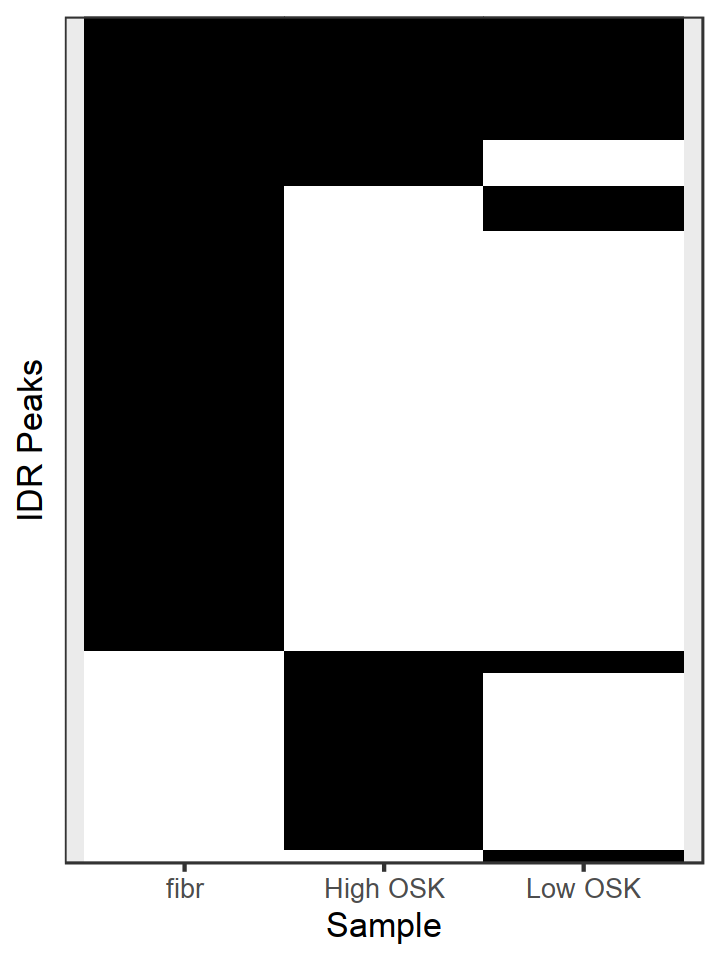

In [72]:
options(repr.plot.width = 6, repr.plot.height = 8)

ggplot(melt(peak_overlaps[seq(1,nrow(peak_overlaps),100),])) +
geom_tile(aes(x=Var2, 
              y=factor(Var1, 
                       levels=as.character(merged_peaks)[seq(1,nrow(peak_overlaps),100)][order(peak_overlaps_state[seq(1,nrow(peak_overlaps),100)])]),
             fill=value)) + 
theme_bw(base_size=20) +
ylab("IDR Peaks") +
xlab("Sample") +
scale_fill_gradient(low='white', high='black') +
theme(axis.text.y=element_blank(),
     axis.ticks.y=element_blank(),
     legend.position="None")

---

In [ ]:
sessionInfo()